In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [70]:
dados = pd.read_csv('diamonds.csv')
dados.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [71]:
dados.rename(columns = {'carat':'Quilate', 'cut':'Corte', 'color':'Cor', 'clarity':'Claridade',
                        'depth':'Profundidade', 'table':'Mesa', 'price':'Preço', 'x':'C',
                        'y':'L', 'z':'P'}, inplace = True)

In [72]:
dados.head(5)

,Quilate,Corte,Cor,Claridade,Profundidade,Mesa,Preço,C,L,P
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [73]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Quilate       50000 non-null  float64
 1   Corte         50000 non-null  object 
 2   Cor           50000 non-null  object 
 3   Claridade     50000 non-null  object 
 4   Profundidade  50000 non-null  float64
 5   Mesa          50000 non-null  float64
 6   Preço         50000 non-null  int64  
 7   C             50000 non-null  float64
 8   L             50000 non-null  float64
 9   P             50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [74]:
dados.Corte.value_counts()

Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: Corte, dtype: int64

In [75]:
corte = {
    'Ideal':'Ideal',
    'Premium':'Prêmio',
    'Very Good':'Muito Bom',
    'Good':'Bom',
    'Fair':'Justo'
}

In [76]:
dados.Corte.map(corte)

0            Ideal
1           Prêmio
2              Bom
3           Prêmio
4              Bom
           ...    
49995        Ideal
49996          Bom
49997    Muito Bom
49998       Prêmio
49999        Ideal
Name: Corte, Length: 50000, dtype: object

In [77]:
dados.Corte = dados.Corte.map(corte)

In [78]:
dados.head(5)

,Quilate,Corte,Cor,Claridade,Profundidade,Mesa,Preço,C,L,P
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Prêmio,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Bom,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Prêmio,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Bom,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [79]:
dados.Claridade.value_counts()

SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: Claridade, dtype: int64

In [80]:
dados.Cor.value_counts()

G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: Cor, dtype: int64

In [81]:
dados.Quilate.value_counts()

0.30    2412
0.31    2102
1.01    2097
0.70    1843
0.32    1682
        ... 
4.00       1
3.40       1
3.65       1
2.75       1
2.70       1
Name: Quilate, Length: 272, dtype: int64

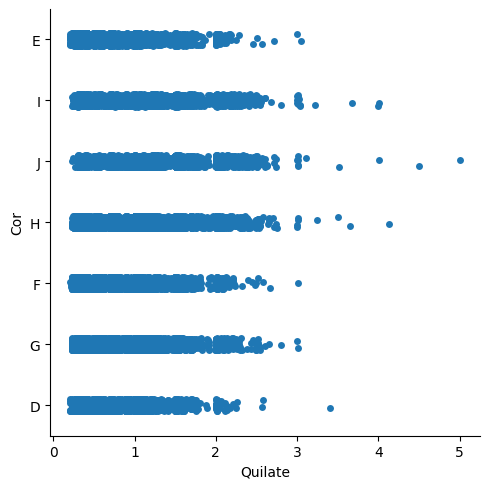

In [82]:
sns.catplot(data = dados, x = dados.Quilate, y = dados.Cor)

In [88]:
sns.histplot(dados, x = dados.Claridade.unique(), y = dados.Claridade)

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 50000 and the vector passed to `x` has length 8.

<AxesSubplot:xlabel='Quilate', ylabel='Claridade'>

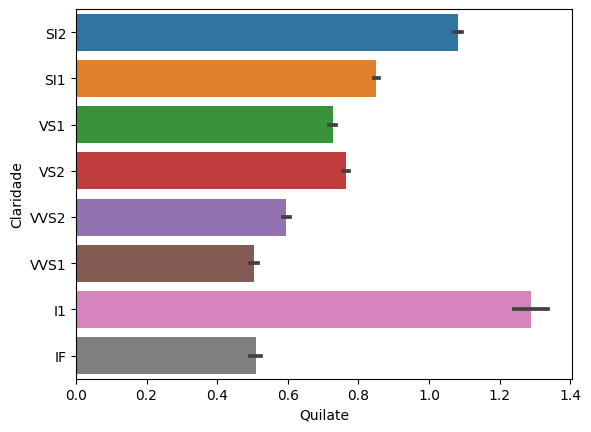

In [84]:
sns.barplot(x = dados.Quilate, y = dados.Claridade, data = dados)

In [ ]:
for coluna in dados.columns:
    grafico = px.histogram(dados, x = coluna, color = 'Cor')
    grafico.show()